Source: https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("Data/student-por.csv", sep = ";")

In [3]:
raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
raw.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
raw.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Data is complete, no missing values

# Descriptive Variable Analysis

In [6]:
def plot(box_data, box_label, pie_data, pie_label, var_name):
    print(" | ".join([f'{pie_label[i]}: {pie_data[i]}' for i in range(len(pie_data))]))
    fig, ax = plt.subplots(1, 3 ,figsize = (20,5))
    
    ax[0].boxplot(box_data)
    ax[0].set_title(f'Grade by {var_name}')
    ax[0].set_xticks(range(1, len(box_label)+1))
    ax[0].set_xticklabels(box_label)
    ax[0].set_xlabel(var_name)
    ax[0].set_ylabel('Grade')
    
    ax[1].pie(pie_data, labels = pie_label, autopct='%1.1f%%')
    ax[1].set_title(f"Sample Size for {var_name}")
    
    ax[2].bar(pie_label,pie_data)
    ax[2].set_xlabel(var_name)
    ax[2].set_ylabel("Sample")
    plt.show()

def describe_var(data, var: str):
    labels = sorted(data[var].unique())
    grades = [list() for _ in labels]
    for i in range(len(data)):
        temp = data[var][i]
        grades[labels.index(temp)].append(data['G3'][i])
    counts = [list(data[var]).count(x) for x in labels]

    plot(grades, labels, counts, labels, var)

GP: 423 | MS: 226


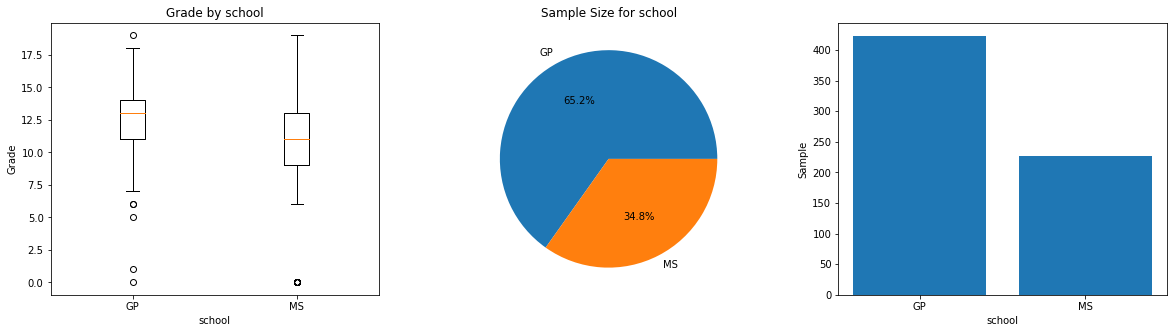

F: 383 | M: 266


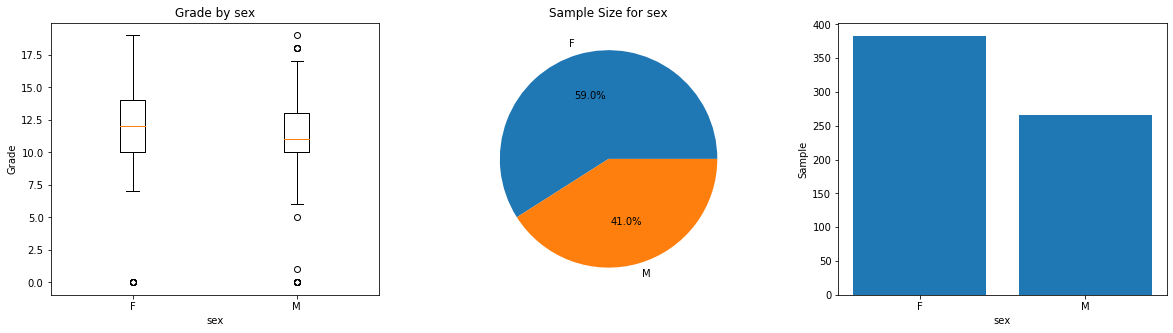

15: 112 | 16: 177 | 17: 179 | 18: 140 | 19: 32 | 20: 6 | 21: 2 | 22: 1


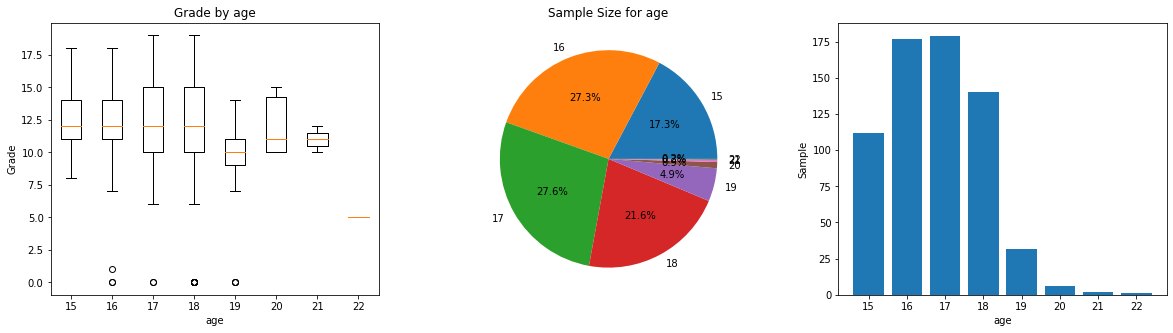

R: 197 | U: 452


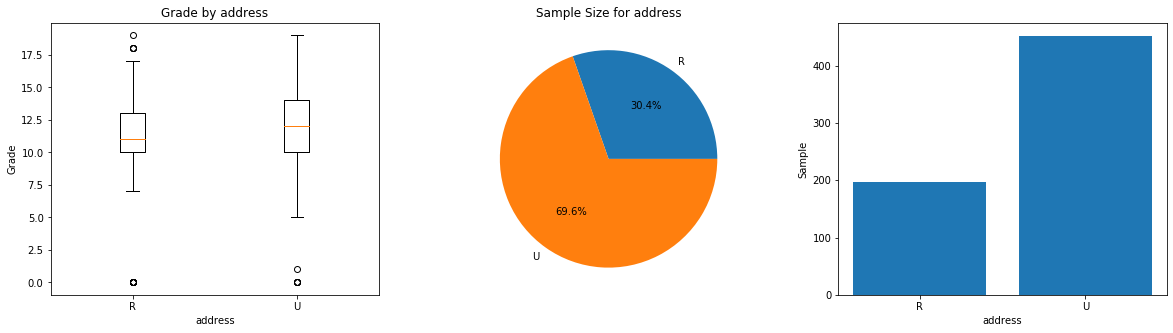

GT3: 457 | LE3: 192


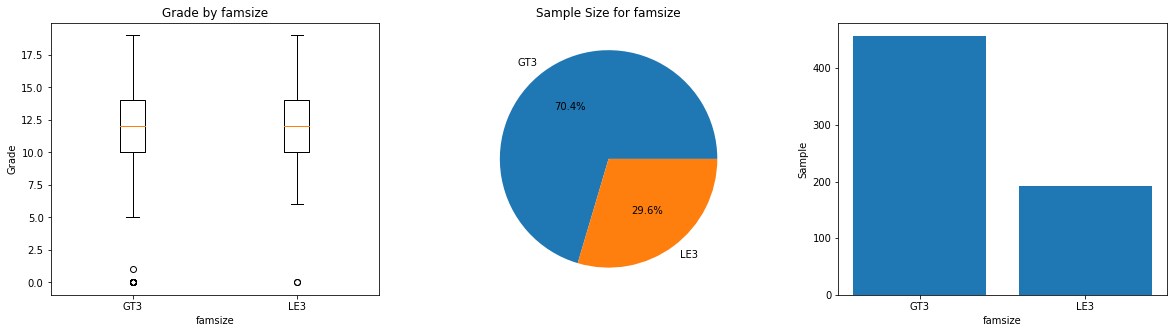

A: 80 | T: 569


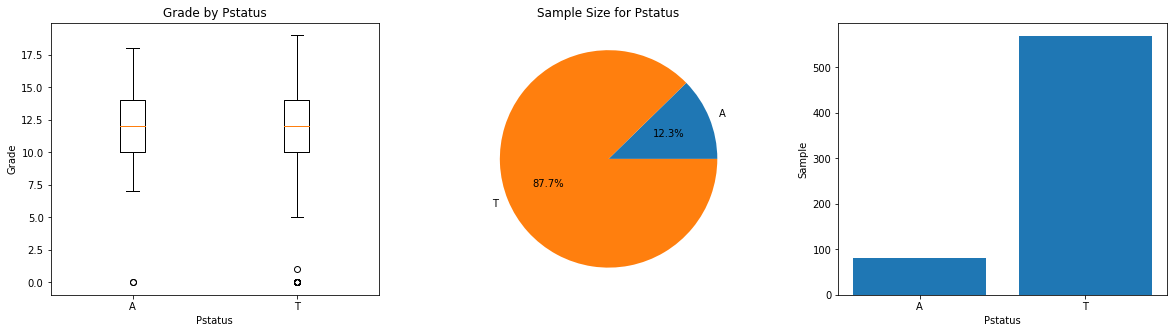

0: 6 | 1: 143 | 2: 186 | 3: 139 | 4: 175


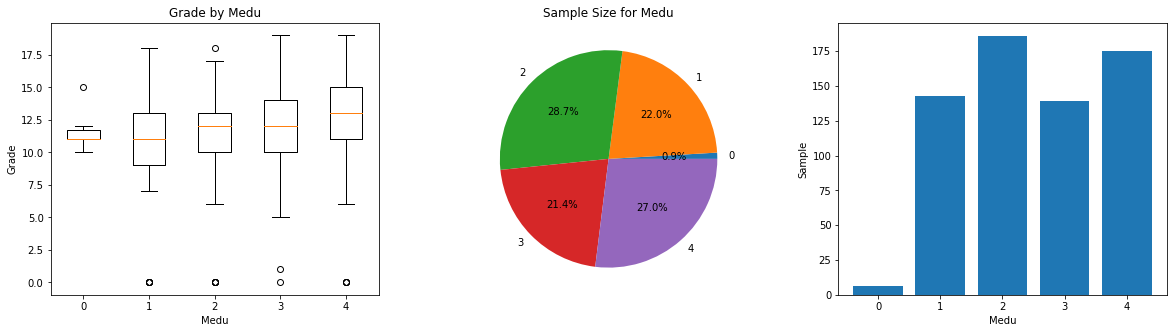

0: 7 | 1: 174 | 2: 209 | 3: 131 | 4: 128


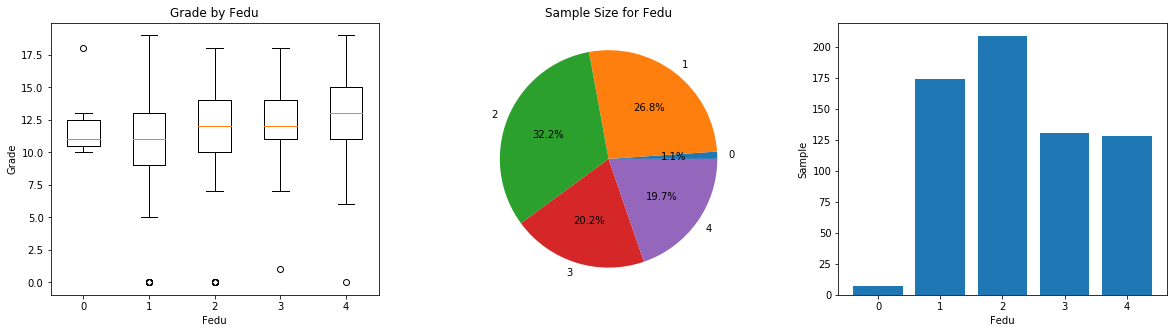

at_home: 135 | health: 48 | other: 258 | services: 136 | teacher: 72


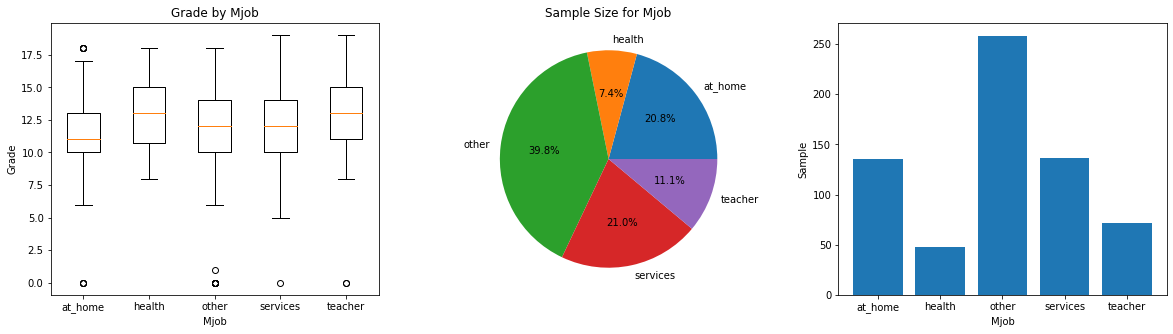

at_home: 42 | health: 23 | other: 367 | services: 181 | teacher: 36


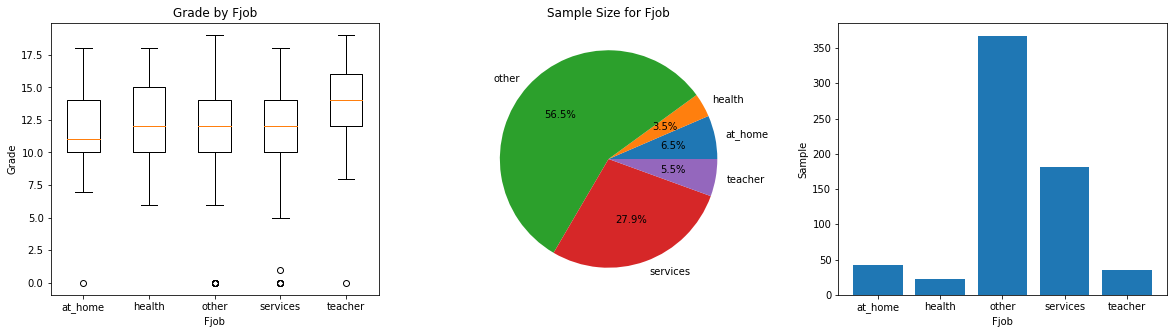

course: 285 | home: 149 | other: 72 | reputation: 143


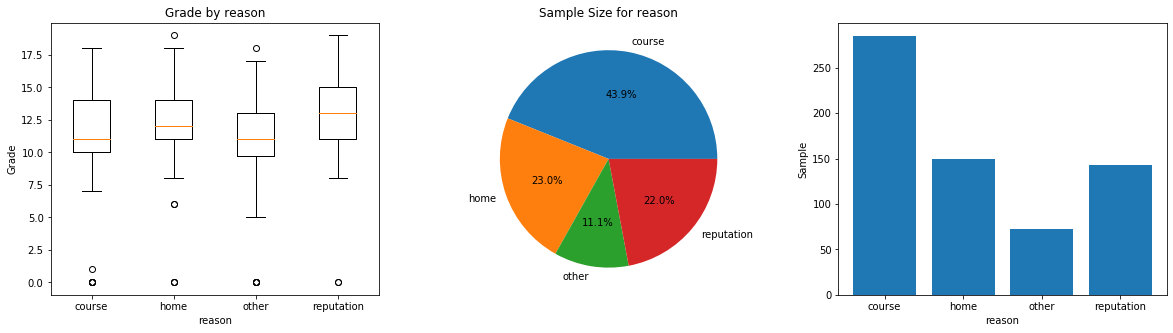

father: 153 | mother: 455 | other: 41


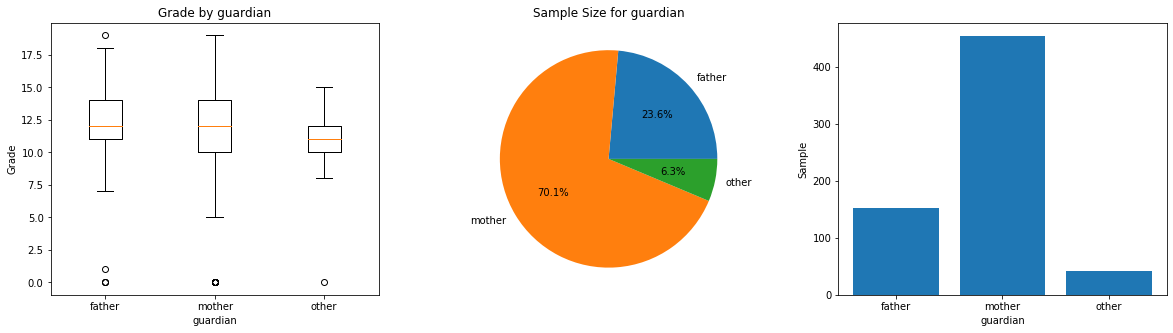

1: 366 | 2: 213 | 3: 54 | 4: 16


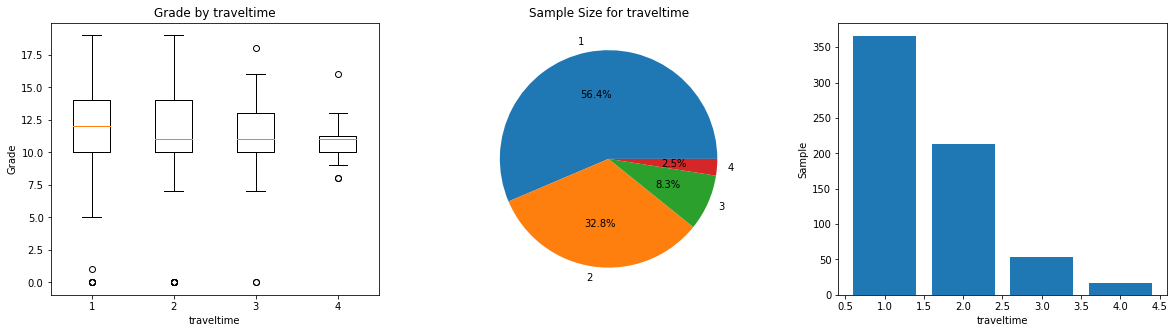

1: 212 | 2: 305 | 3: 97 | 4: 35


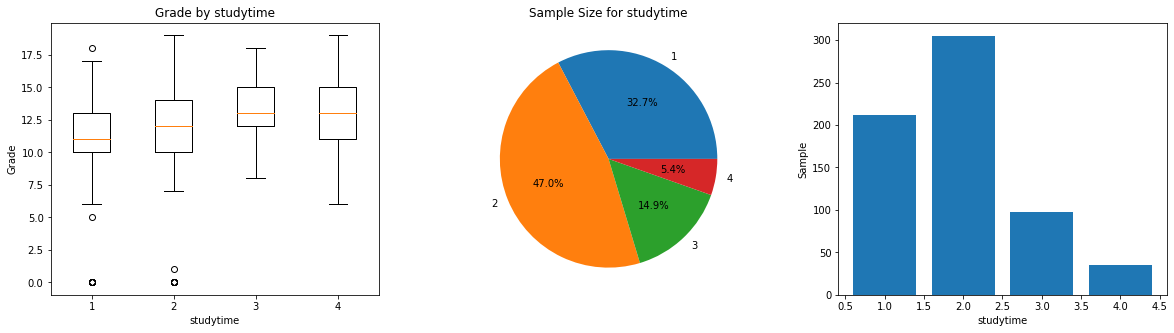

0: 549 | 1: 70 | 2: 16 | 3: 14


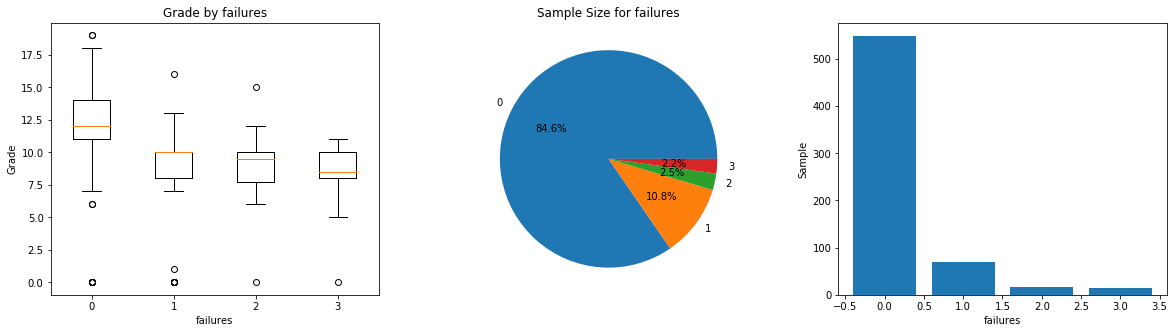

no: 581 | yes: 68


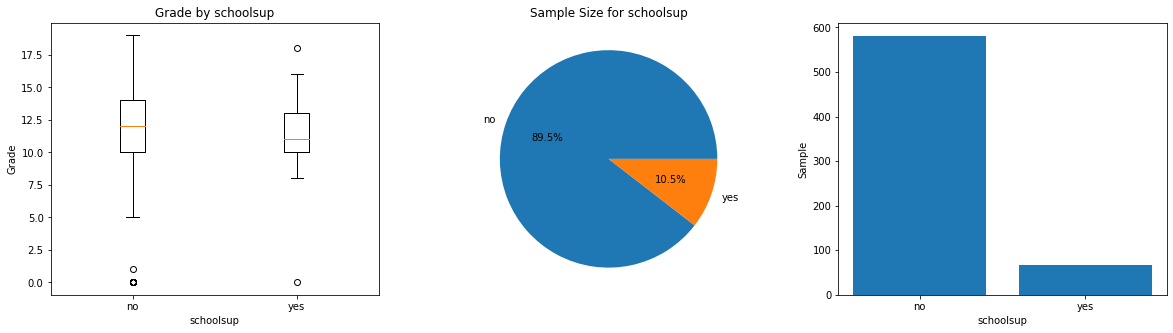

no: 251 | yes: 398


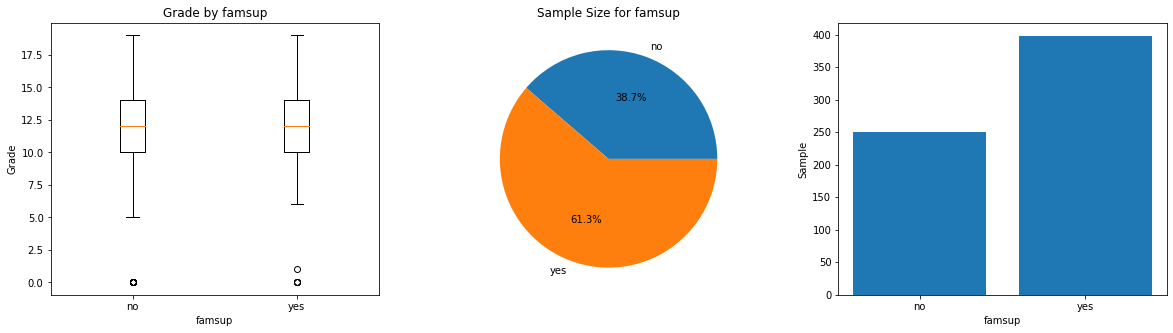

no: 610 | yes: 39


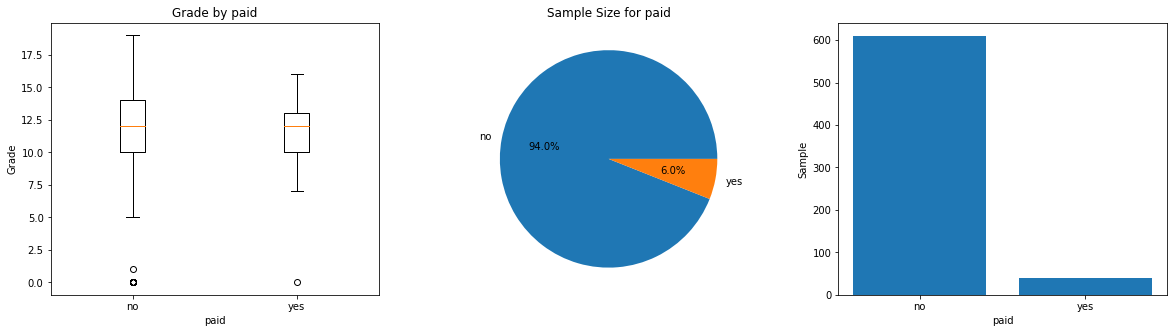

no: 334 | yes: 315


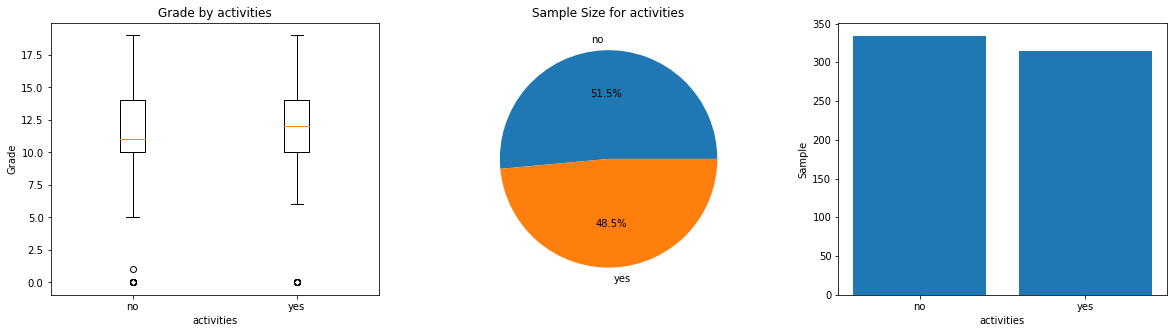

no: 128 | yes: 521


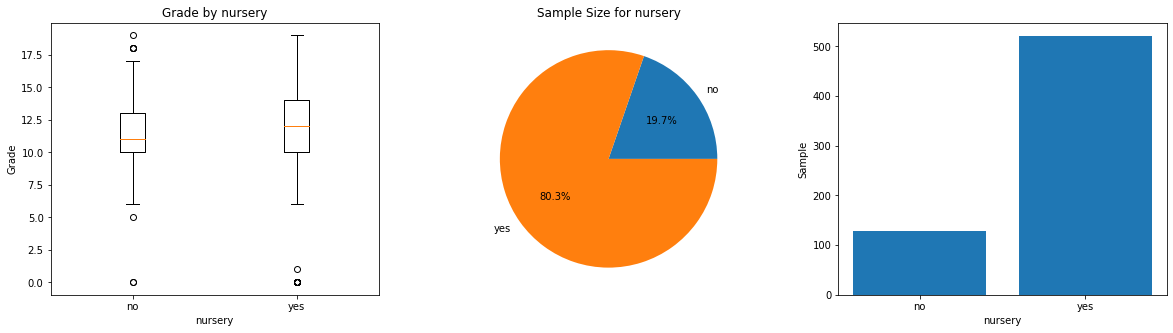

no: 69 | yes: 580


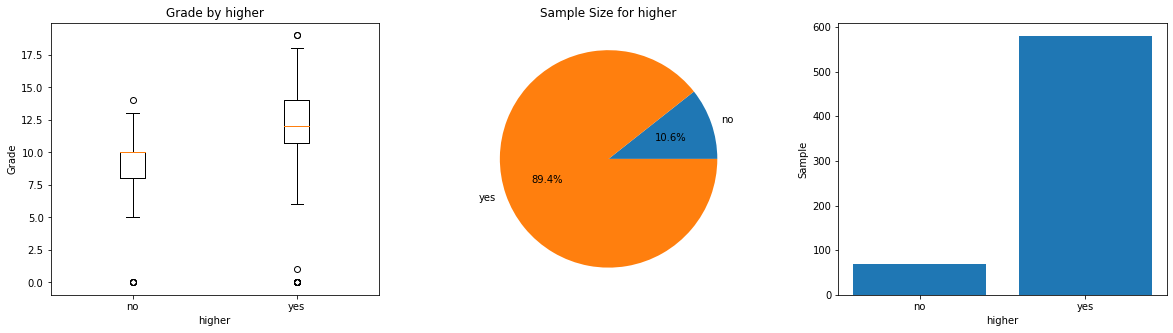

no: 151 | yes: 498


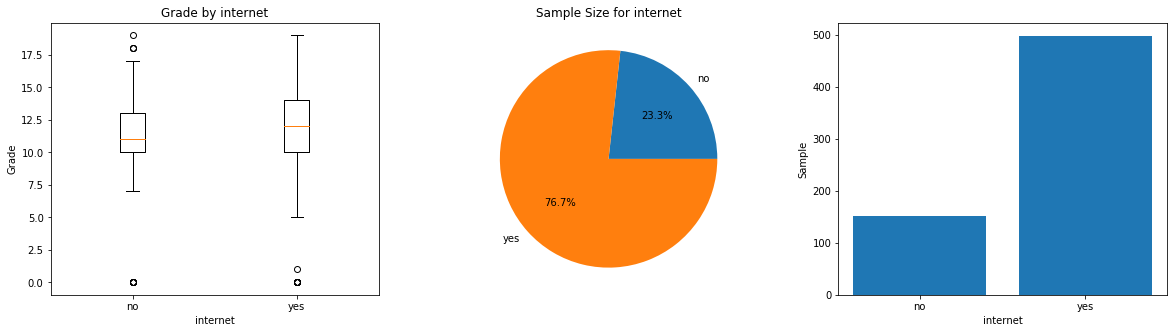

no: 410 | yes: 239


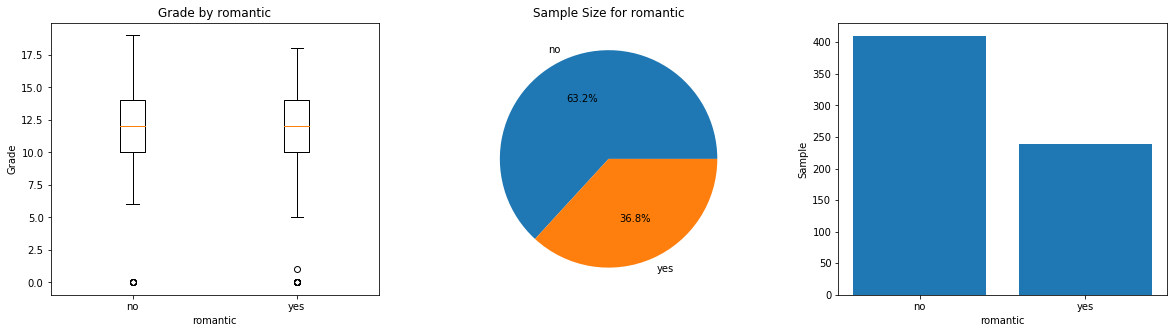

1: 22 | 2: 29 | 3: 101 | 4: 317 | 5: 180


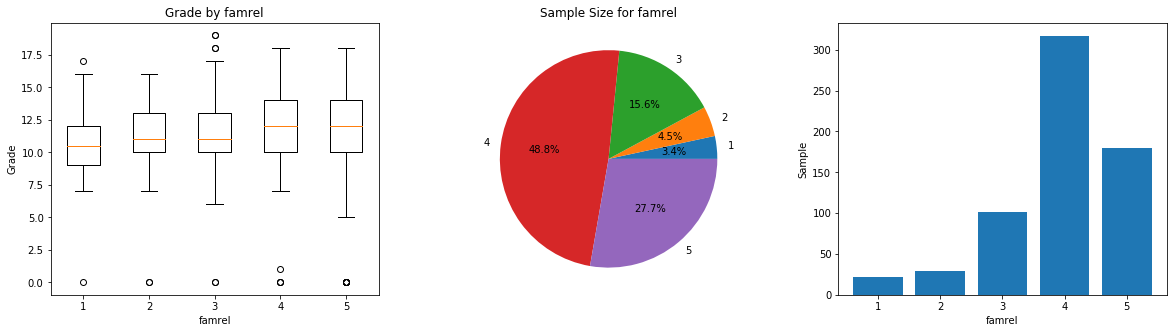

1: 45 | 2: 107 | 3: 251 | 4: 178 | 5: 68


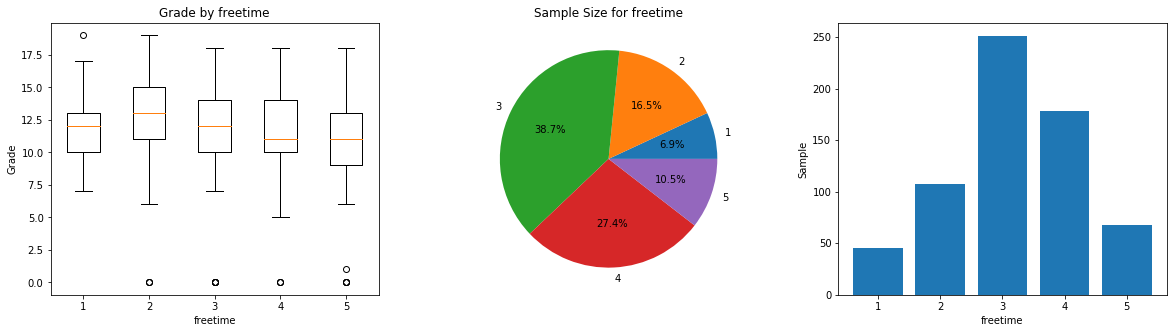

1: 48 | 2: 145 | 3: 205 | 4: 141 | 5: 110


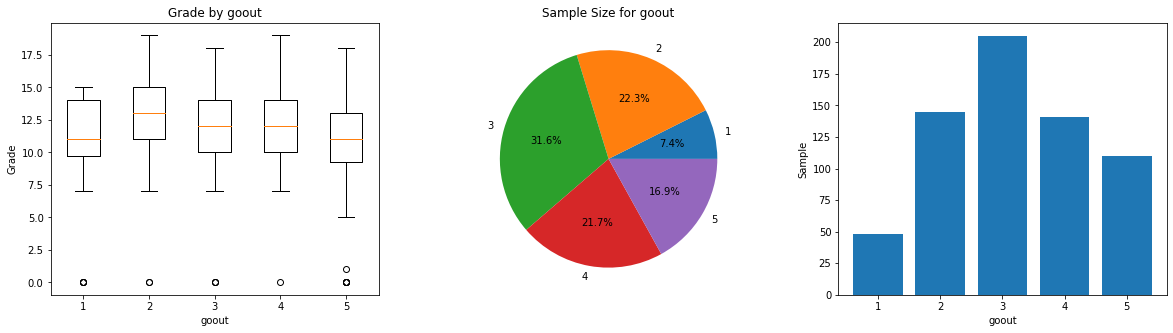

1: 451 | 2: 121 | 3: 43 | 4: 17 | 5: 17


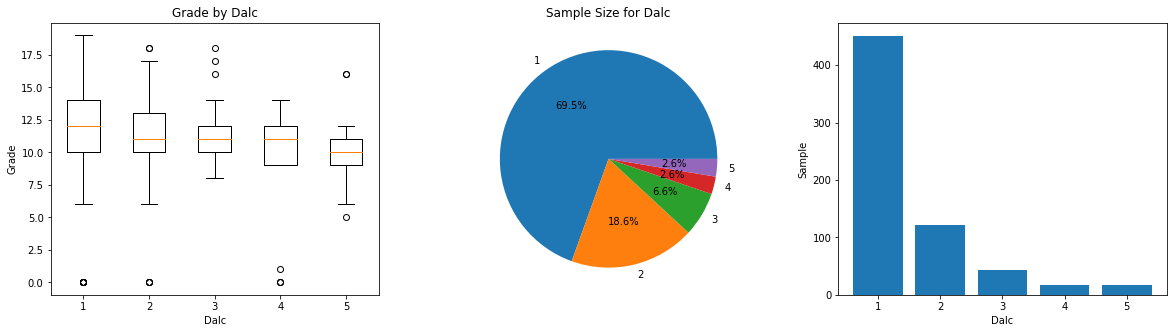

1: 247 | 2: 150 | 3: 120 | 4: 87 | 5: 45


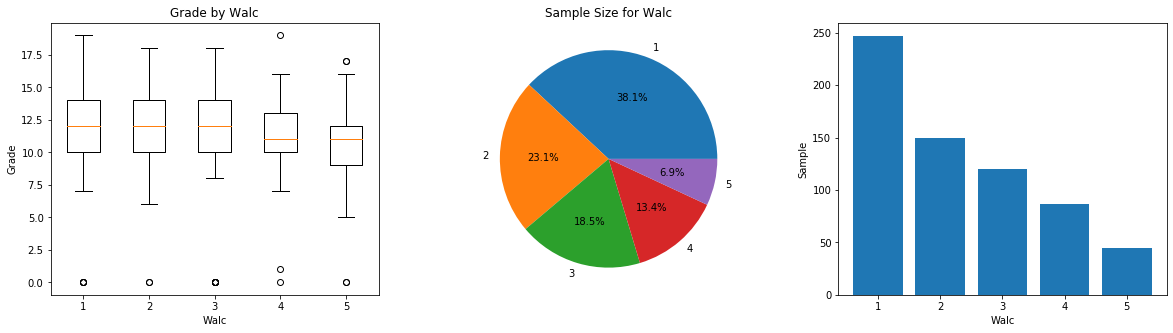

1: 90 | 2: 78 | 3: 124 | 4: 108 | 5: 249


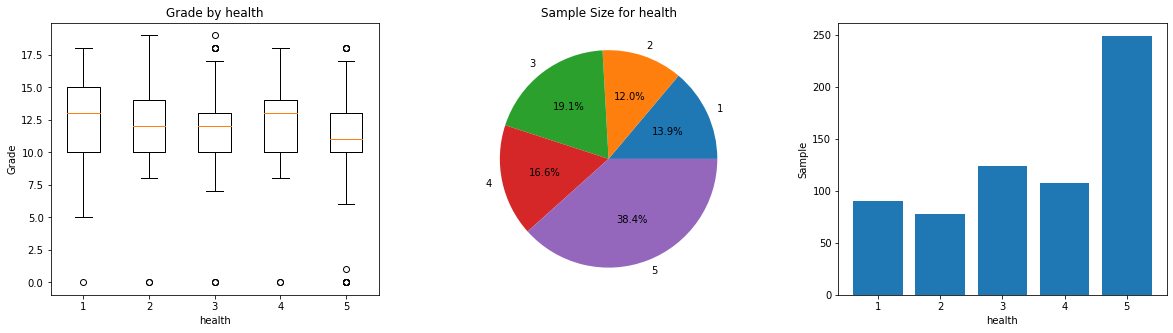

0: 244 | 1: 12 | 2: 110 | 3: 7 | 4: 93 | 5: 12 | 6: 49 | 7: 3 | 8: 42 | 9: 7 | 10: 21 | 11: 5 | 12: 12 | 13: 1 | 14: 8 | 15: 2 | 16: 10 | 18: 3 | 21: 2 | 22: 2 | 24: 1 | 26: 1 | 30: 1 | 32: 1


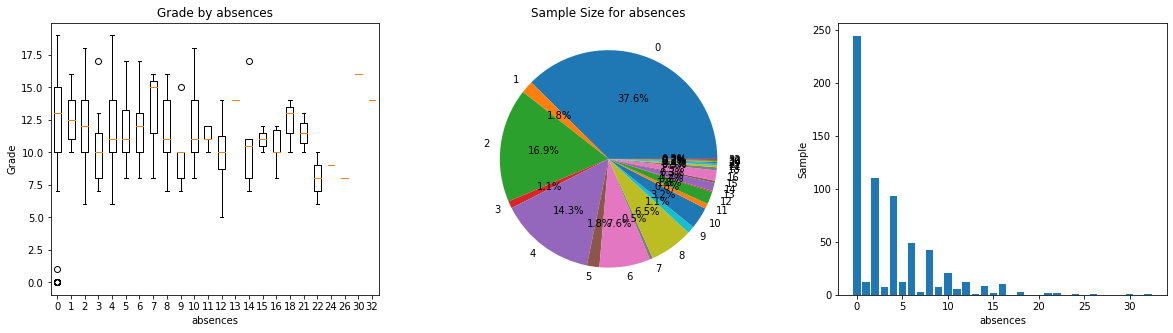

0: 1 | 4: 2 | 5: 5 | 6: 9 | 7: 33 | 8: 42 | 9: 65 | 10: 95 | 11: 91 | 12: 82 | 13: 72 | 14: 71 | 15: 35 | 16: 22 | 17: 16 | 18: 7 | 19: 1


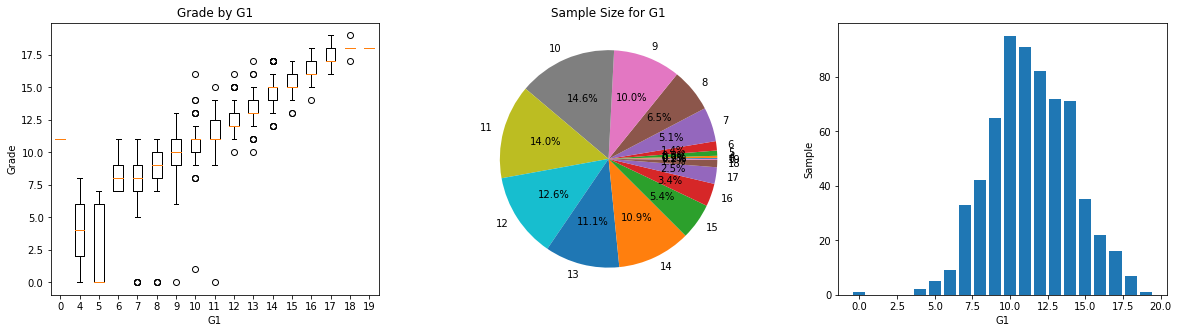

0: 7 | 5: 3 | 6: 7 | 7: 16 | 8: 40 | 9: 72 | 10: 83 | 11: 103 | 12: 86 | 13: 80 | 14: 54 | 15: 38 | 16: 25 | 17: 20 | 18: 14 | 19: 1


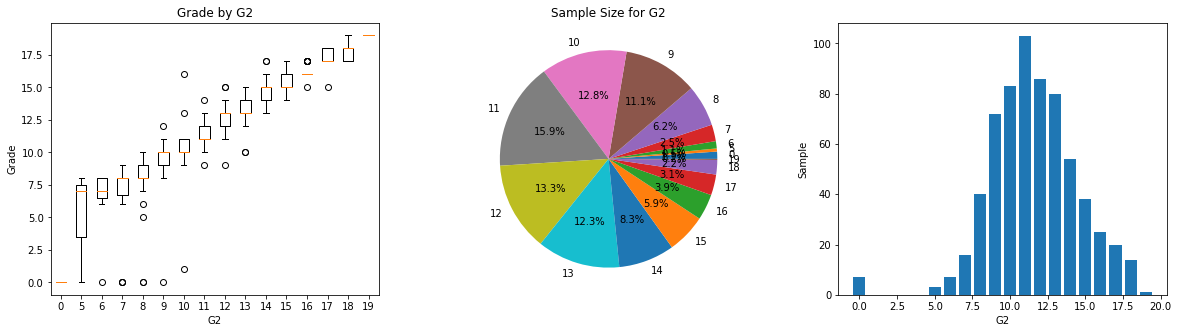

In [7]:
for var in raw.columns[:-1]:
    describe_var(raw, var)

# Correlation Matrix

In [8]:
corr = raw.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11
Medu,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24
Fedu,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12
goout,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09
Dalc,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20


# Feature Engineering - One hot Encoding

In [9]:
def onehot_encode(data, var):
    encode = pd.get_dummies(raw[var])
    for label in raw[var].unique():
        data[f'{var}_{label}'] = encode[label]
    data.drop(var, axis = 1, inplace = True)

In [10]:
# onehot encode
data = raw.copy()
for var in raw.columns:
    if type(raw[var][0]) == str:
        onehot_encode(data, var)

In [11]:
data.head()
# 59 columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_yes,nursery_no,higher_yes,higher_no,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,1,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,1,0,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,1,0,1,0,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,1,0,1,0,1,0


# Feature Selection - Feature Importance with Trees

A drops G1 and G2\
B all variables

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [32]:
y = data['G3']
X_A = data.drop(['G3','G1','G2'], axis = 1)  
X_B = data.drop(['G3'], axis = 1)

In [107]:
def feature_select(X, y, max_features = None):
    selection = SelectFromModel(ExtraTreesClassifier(n_estimators = 200), max_features = max_features)
    selection.fit(X, y)
    selection.get_support()
    
    selected_feat= X.columns[(selection.get_support())]
    #print(len(selected_feat), selected_feat)
    
    X = selection.transform(X)
    return X, selected_feat

def show_selection(X, y, n_selection):
    forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)
    forest.fit(X,y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(n_selection):
        print(f'{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]})')
    plt.figure(figsize=(25,10))
    plt.title("Feature importances with std")
    indices = indices[:n_selection]
    plt.bar(range(n_selection), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(n_selection), [X.columns[i] for i in indices])
    plt.xlim([-1, n_selection])
    plt.show()

23 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'sex_M',
       'Mjob_other', 'Fjob_other', 'Fjob_services', 'reason_course',
       'reason_home', 'famsup_no', 'famsup_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')
Feature ranking:
1. absences (0.040263260366210724)
2. age (0.03720486906314541)
3. goout (0.03672200805419668)
4. Walc (0.0354756577549865)
5. health (0.034885056044834696)
6. freetime (0.03377209330564933)
7. Fedu (0.03250105358461644)
8. Medu (0.032490088366288576)
9. famrel (0.032149210989945935)
10. studytime (0.030289065125395274)
11. traveltime (0.027843356683933985)
12. Dalc (0.022644433930237014)
13. Fjob_other (0.022483816314940182)
14. reason_course (0.02046166720256732)
15. famsup_no (0.019946313896560562)
16. famsup_yes (0.019580579260400254)
17. Mjob_other (0.019354891624889698)
18. romantic_no (0.019049309673154272)
19. romantic_yes (0.01892

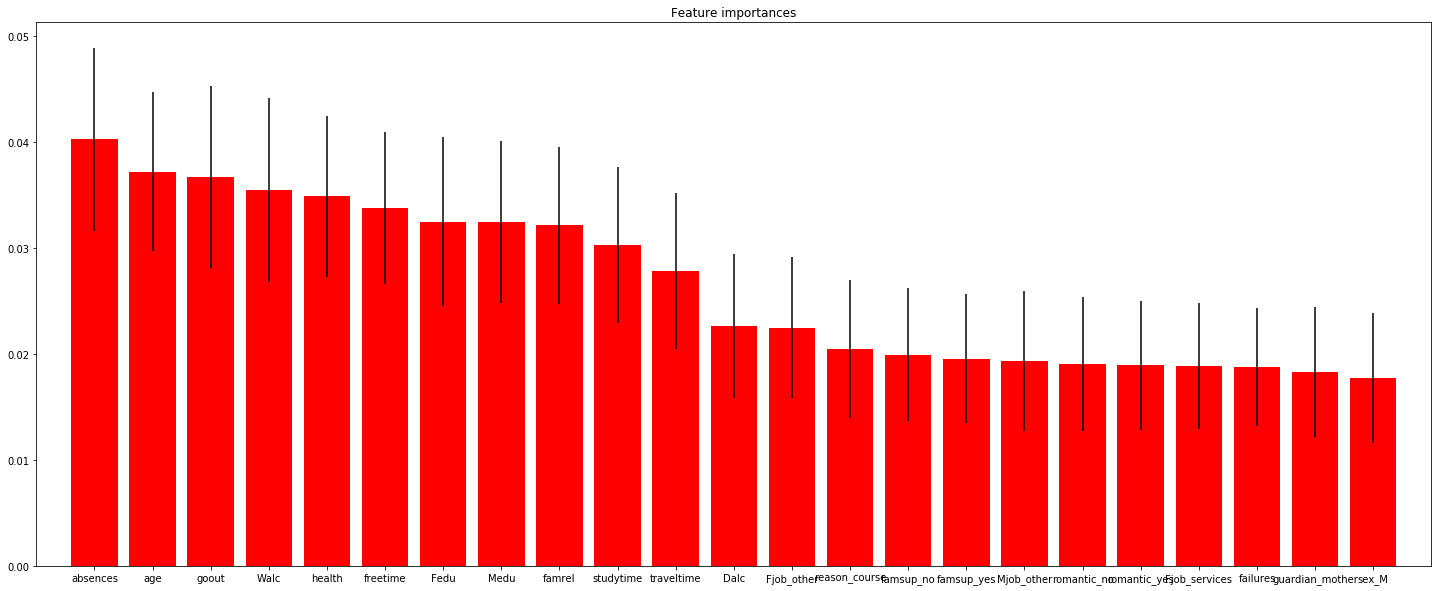

In [15]:
X, selected_feat = feature_select(X_A, y)
show_selection(X_A,y, X.shape[1])

16 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Fjob_other',
       'reason_course'],
      dtype='object')
Feature ranking:
1. G2 (0.10541526654765013)
2. G1 (0.07196084986924428)
3. absences (0.029423280711659627)
4. age (0.02822400060431366)
5. goout (0.028184435043281626)
6. Walc (0.027737402519385248)
7. freetime (0.026877026631462405)
8. health (0.026859013616963617)
9. Fedu (0.025584253607456066)
10. Medu (0.025421146105028717)
11. famrel (0.0249625728913108)
12. studytime (0.023348477388105037)
13. traveltime (0.022707301483529254)
14. Dalc (0.018908218270452547)
15. Fjob_other (0.017902975808517352)
16. famsup_yes (0.0171046653378399)


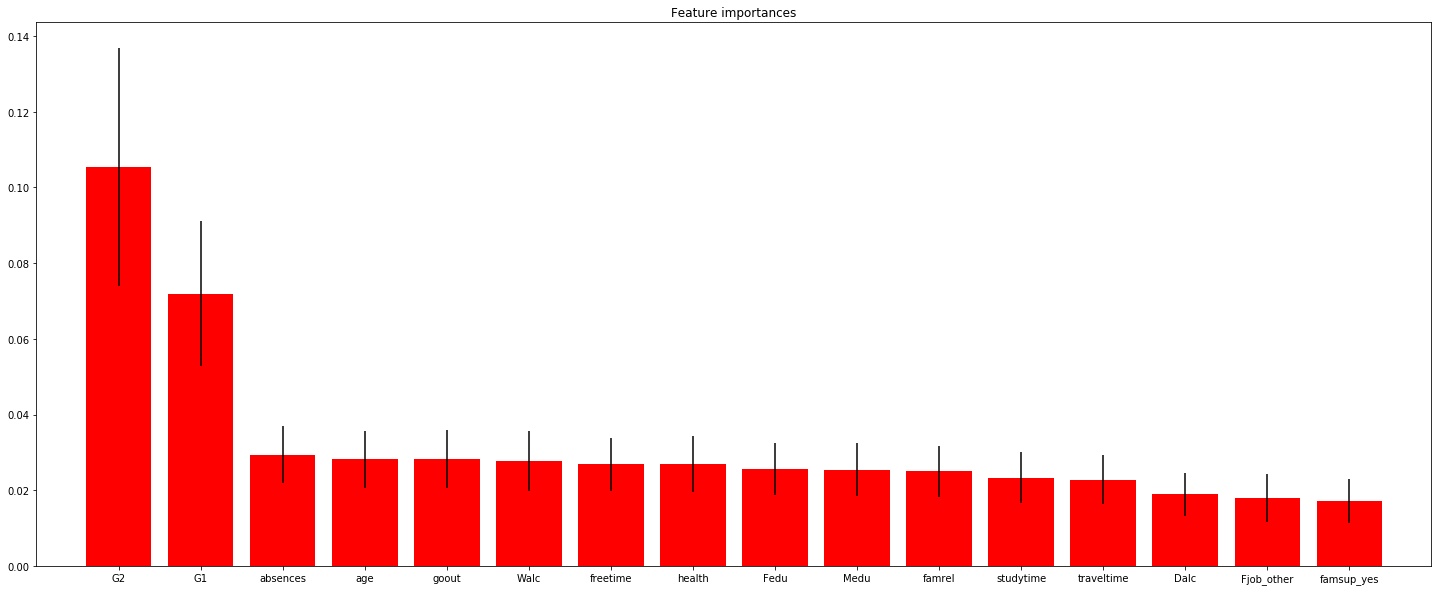

In [16]:
X, selected_feat = feature_select(X_B, y)
show_selection(X_B,y, X.shape[1])

## Model Selection - Regression

### KNRegression

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
def myCV(model, X, y, cv: int, scoring:str):
    cv_results = cross_validate(model, X, y, cv = cv, scoring = scoring)
    scores = cv_results['test_score']
    
    return np.max(scores), np.min(scores), np.mean(scores), np.median(scores)

def report(_max, _min, mean, median):
    print(f'max: {_max}, min: {_min}')
    print(f'mean: {mean}, median: {median}')
    
def model_select_KNR(krange, X, y, nfolds = 5, scoring = 'neg_mean_squared_error' ):
    lmax, lmin, lmean, lmedian = [], [], [], []
    for k in krange:
        model = KNeighborsRegressor(n_neighbors = k)
        _max, _min, mean, median = myCV(model, X, y, cv=nfolds, scoring = scoring)
        lmax.append(_max)
        lmin.append(_min)
        lmean.append(mean)
        lmedian.append(median)
    return lmax, lmin, lmean, lmedian

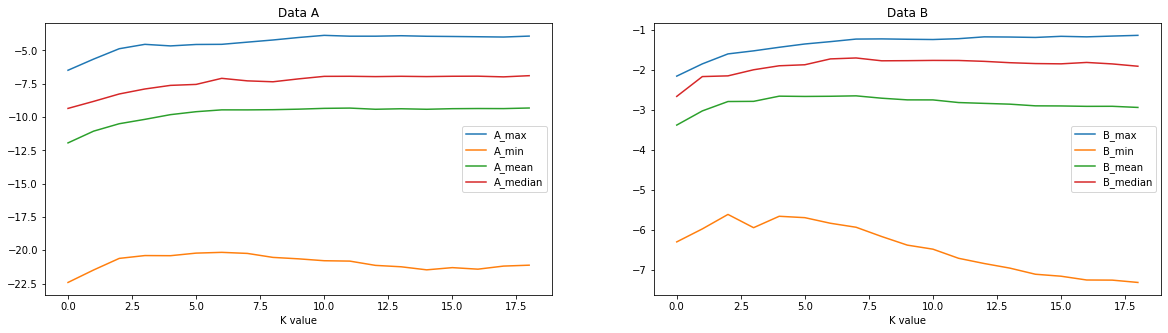

24 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'sex_F',
       'famsize_GT3', 'Mjob_other', 'Fjob_other', 'Fjob_services',
       'reason_course', 'reason_home', 'famsup_no', 'famsup_yes',
       'romantic_no', 'romantic_yes'],
      dtype='object')
16 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Fjob_other',
       'famsup_yes'],
      dtype='object')


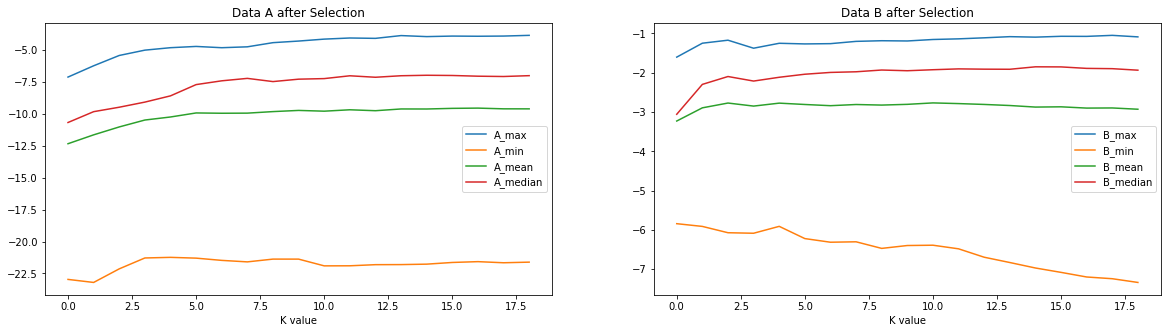

In [26]:
fig, ax = plt.subplots(1, 2 ,figsize = (20,5))

krange = range(2, 21)

X = X_A
lmax, lmin, lmean, lmedian = model_select_KNR(krange, X, y, nfolds = 5)
ax[0].plot(lmax, label = 'A_max')
ax[0].plot(lmin,label = 'A_min')
ax[0].plot(lmean, label = 'A_mean')
ax[0].plot(lmedian, label = 'A_median')
ax[0].legend(); ax[0].set_title('Data A'); ax[0].set_xlabel('K value')

X = X_B
lmax, lmin, lmean, lmedian = model_select_KNR(krange, X, y, nfolds = 5)
ax[1].plot(lmax, label = 'B_max')
ax[1].plot(lmin,label = 'B_min')
ax[1].plot(lmean, label = 'B_mean')
ax[1].plot(lmedian, label = 'B_median')
ax[1].legend(); ax[1].set_title('Data B'); ax[1].set_xlabel('K value')

plt.show()


fig, ax = plt.subplots(1, 2 ,figsize = (20,5))
X, _ = feature_select(X_A, y)
lmax, lmin, lmean, lmedian = model_select_KNR(krange, X, y, nfolds = 5)
ax[0].plot(lmax, label = 'A_max')
ax[0].plot(lmin,label = 'A_min')
ax[0].plot(lmean, label = 'A_mean')
ax[0].plot(lmedian, label = 'A_median')
ax[0].legend(); ax[0].set_title('Data A after Selection'); ax[0].set_xlabel('K value')

X, _ = feature_select(X_B, y)
lmax, lmin, lmean, lmedian = model_select_KNR(krange, X, y, nfolds = 5)
ax[1].plot(lmax, label = 'B_max')
ax[1].plot(lmin,label = 'B_min')
ax[1].plot(lmean, label = 'B_mean')
ax[1].plot(lmedian, label = 'B_median')
ax[1].legend(); ax[1].set_title('Data B after Selection'); ax[1].set_xlabel('K value')

plt.show()

### Decesion Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree

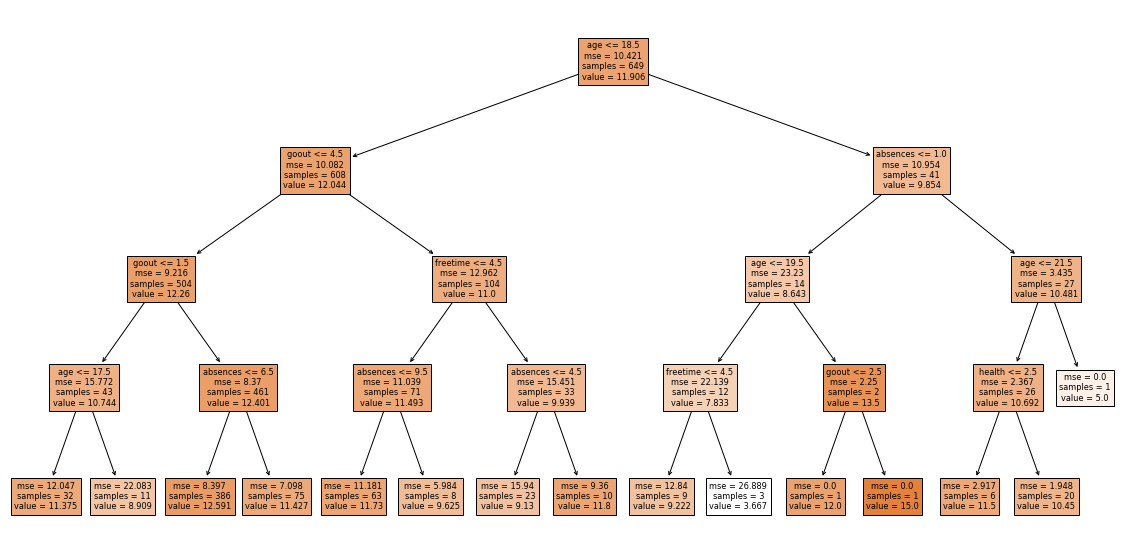

In [110]:
X,selected_feat = feature_select(X_A, y, max_features = 5)

reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X, y)

plt.figure(figsize = (20,10))
tree.plot_tree(reg_tree, filled=True, feature_names = selected_feat)
plt.show()

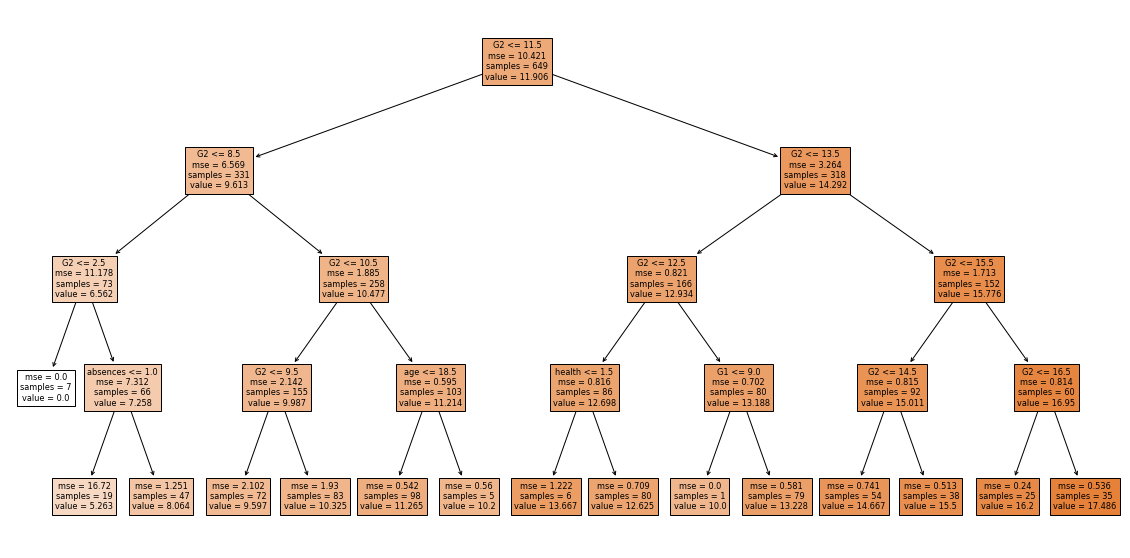

In [115]:
X,selected_feat = feature_select(X_B, y, max_features = 7)

reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X, y)

plt.figure(figsize = (20,10))
tree.plot_tree(reg_tree, filled=True, feature_names = selected_feat)
plt.show()